<a href="https://colab.research.google.com/github/TechyMT/ClassWork/blob/main/DSBDA/Assgn10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Data Analytics 3
Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.

Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report

In [113]:
df = pd.read_csv("/content/Iris.csv")

In [97]:
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [99]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [100]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [101]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [114]:
df.drop(["Id"],inplace=True, axis=1)

<Axes: >

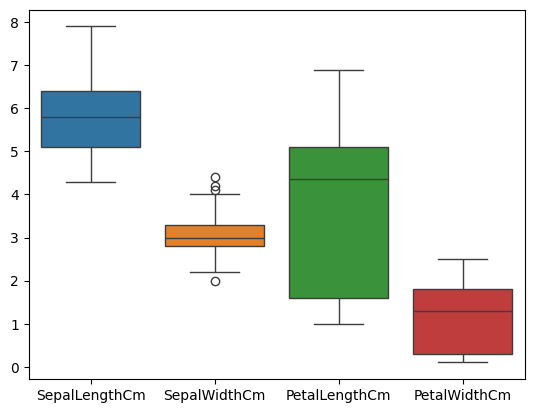

In [103]:
sns.boxplot(data=df.drop(["Species"],axis=1))

In [115]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

<Axes: >

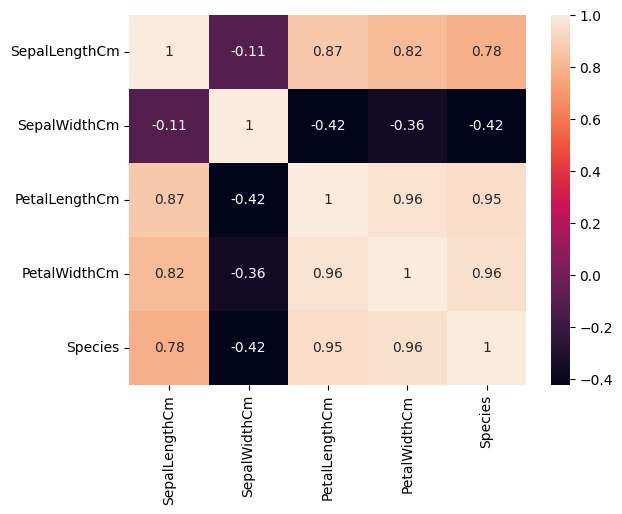

In [116]:
sns.heatmap(data=df.corr(),annot=True)

<Axes: >

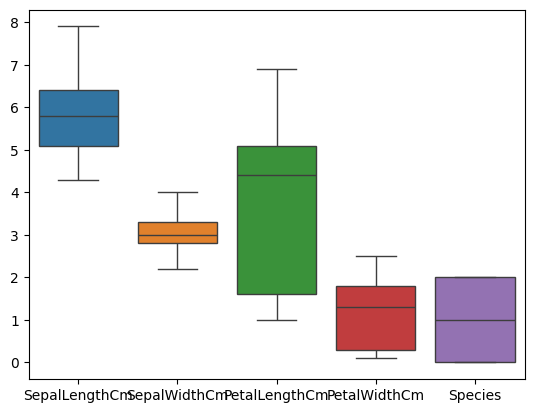

In [106]:
def remove_outlier(feature):
  global df
  q3,q1 = np.percentile(df[feature],(75,25))
  iqr = q3-q1
  df = df[(df[feature] >= q1 - 1.5*iqr) & (df[feature] <= q3+ 1.5*iqr)]

remove_outlier("SepalWidthCm")

sns.boxplot(data=df)

In [117]:
X = df.drop(["Species"],axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=20)


model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))


0.9111111111111111


[[14  0  0]
 [ 0 14  2]
 [ 0  4 10]]


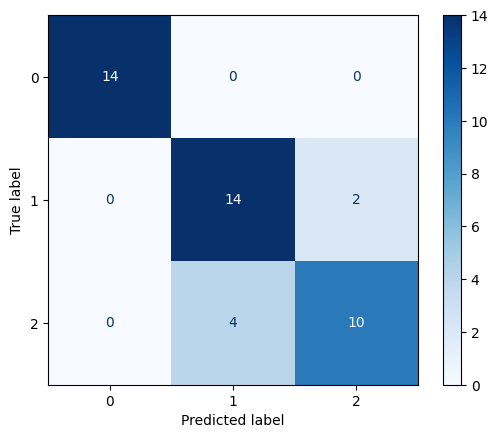

In [108]:
matrix = confusion_matrix(y_test, y_pred, labels= model.classes_)
print(matrix)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix= matrix, display_labels=model.classes_)
conf_matrix.plot(cmap="Blues")


In [110]:
tp,fn, fp,tn = confusion_matrix(y_test,y_pred, labels=[1,0]).reshape(-1)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.78      0.88      0.82        16
           2       0.83      0.71      0.77        14

    accuracy                           0.86        44
   macro avg       0.87      0.86      0.86        44
weighted avg       0.87      0.86      0.86        44

